### Downlaod the data

In [6]:
import requests
import os
url = 'https://www.abs.gov.au/statistics/people/population/regional-population/2022-23/32180DS0001_2022-23.xlsx'
file_path = '../data/raw/external/SA2'
csv_path = os.path.join(file_path, 'sa2_popluation.xlsx')
response = requests.get(url)
with open(csv_path, 'wb') as file:
    file.write(response.content)



In [7]:

import zipfile
url_zip = 'https://www.abs.gov.au/census/find-census-data/datapacks/download/2021_GCP_SA2_for_VIC_short-header.zip'
response = requests.get(url_zip)
output = '../data/raw/external/SA2' 
zip_path = os.path.join(output, 'income.zip')
if response.status_code == 200:
    with open(zip_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Extract the contents of the zip file
if os.path.isfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output)
else:
    print(f"{zip_path} is not a file.")

### Read the data

In [8]:
import pandas as pd

In [9]:
popluation_df = pd.read_excel('../data/raw/external/SA2/sa2_popluation.xlsx',sheet_name='Table 2')

In [10]:
popluation = popluation_df[[ 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 11','Unnamed: 14','Unnamed: 16']]
popluation= popluation.rename(columns={
    'Unnamed: 6': 'SA2 code',
    'Unnamed: 7': 'SA2 name',
    'Unnamed: 8': '2022 popluation',
    'Unnamed: 9': '2023 popluation',
    'Unnamed: 11': 'ERP change %',
    'Unnamed: 14': 'Net overseas migration',
    'Unnamed: 16': 'Population density 2023 (persons/km2)'
})
popluation = popluation.iloc[6:-1,]

popluation.to_csv('../data/curated/external/SA2/sa2population.csv')

In [11]:
income_df = pd.read_csv('../data/raw/external/SA2/2021 Census GCP Statistical Area 2 for VIC/2021Census_G02_VIC_SA2.csv')
income = income_df[[ 'SA2_CODE_2021','Median_tot_prsnl_inc_weekly' ]]
income = income.rename(columns={
    'SA2_CODE_2021': 'SA2 code'   
})
income.to_csv('../data/curated/external/SA2/sa2income.csv')

In [12]:
pop_21 = pd.read_csv('../data/raw/external/SA2/2021 Census GCP Statistical Area 2 for VIC/2021Census_G01_VIC_SA2.csv')
pop_21_col = pop_21[['SA2_CODE_2021','Tot_P_P']]
pop_21_col = pop_21_col.rename(columns={
    'SA2_CODE_2021': 'SA2 code',
    'Tot_P_P': '2021 popluation'   
})
pop_21_col.to_csv('../data/curated/external/SA2/sa2_21pop.csv')

In [13]:
income_pop = pd.merge(popluation,income,on='SA2 code',how='left')
final_df = pd.merge(income_pop,pop_21_col,on='SA2 code',how='outer')
final_df.to_csv('../data/curated/external/SA2/sa2final.csv')

/var/folders/fm/4pzfftsd6qb2whdqrz68_g4m0000gn/T/ipykernel_8919/30297917.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  final_df = pd.merge(income_pop,pop_21_col,on='SA2 code',how='outer')


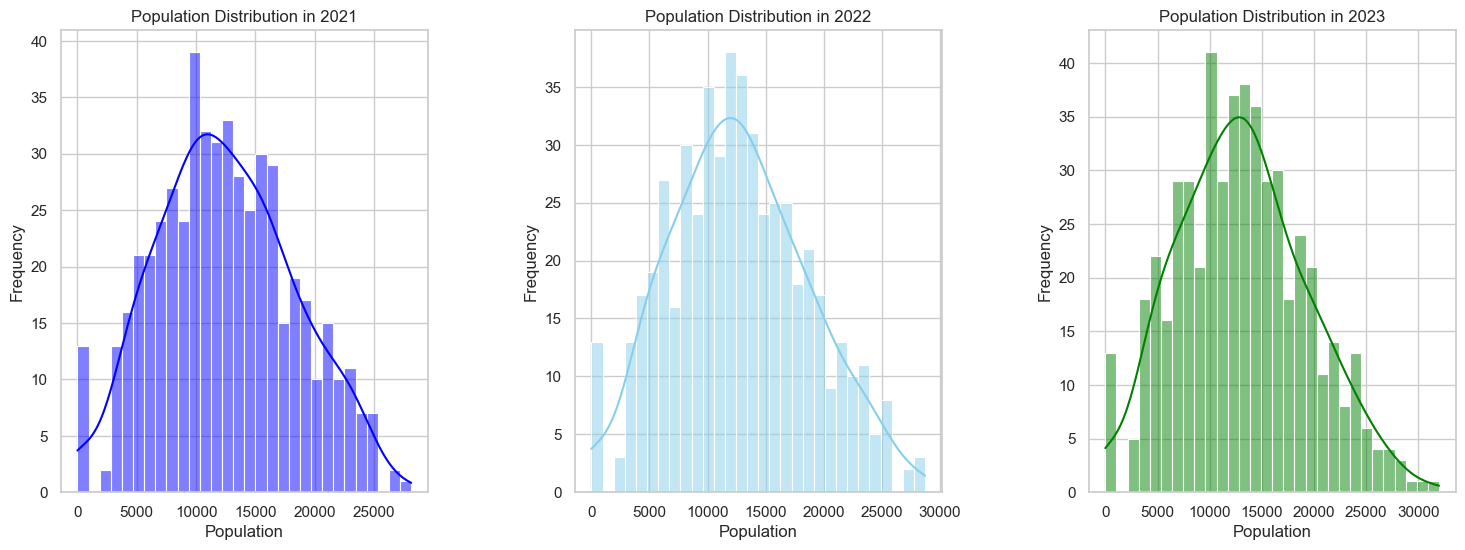

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt_dt = final_df.iloc[0:522]

sns.set(style="whitegrid")

### subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

### 2021
sns.histplot(plt_dt['2021 popluation'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Population Distribution in 2021')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Frequency')

### 2022
sns.histplot(plt_dt['2022 popluation'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Population Distribution in 2022')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Frequency')

### 2023
sns.histplot(plt_dt['2023 popluation'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Population Distribution in 2023')
axes[2].set_xlabel('Population')
axes[2].set_ylabel('Frequency')

plt.show()


In [15]:
a = sum(plt_dt['2021 popluation'])
b = sum(plt_dt['2022 popluation'])
c = sum(plt_dt['2023 popluation'])

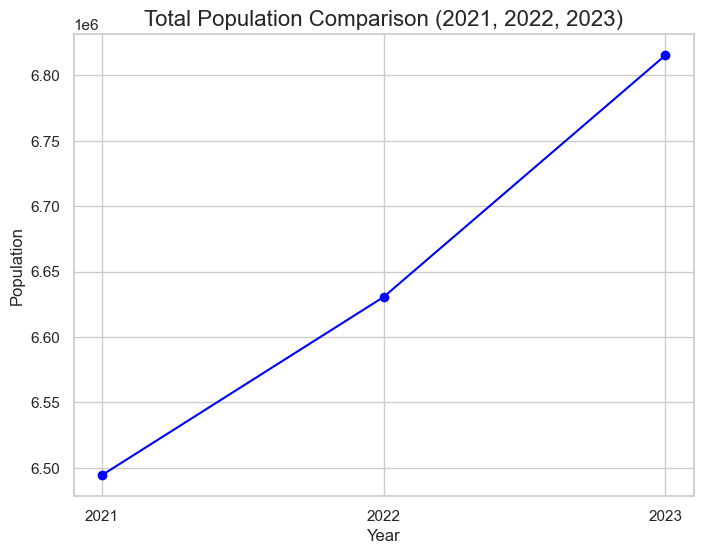

In [16]:
import matplotlib.pyplot as plt

a = sum(plt_dt['2021 popluation'])  
b = sum(plt_dt['2022 popluation']) 
c = sum(plt_dt['2023 popluation'])

current_df = {
    'Year': ['2021', '2022', '2023'],
    'Population': [a, b, c]
}


plt.figure(figsize=(8, 6))
plt.plot(current_df['Year'], current_df['Population'], marker='o', color='blue') 


plt.title('Total Population Comparison (2021, 2022, 2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)

plt.grid(True)


plt.show()



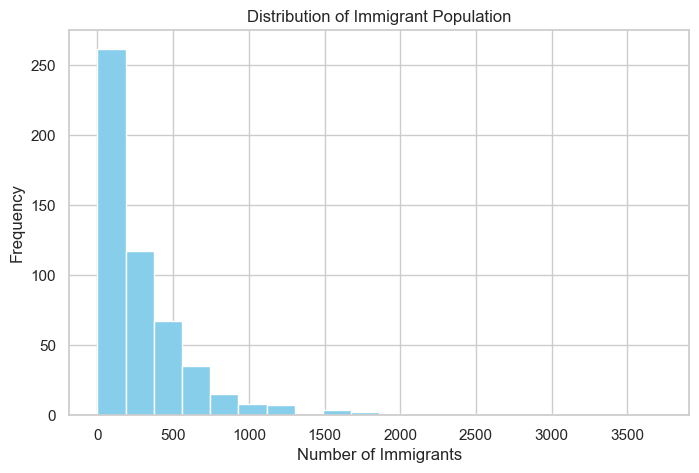

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(plt_dt['Net overseas migration'], bins=20, color='skyblue')
plt.xlabel('Number of Immigrants')
plt.ylabel('Frequency')
plt.title('Distribution of Immigrant Population')
plt.show()